# Michael Ersevim

Neural Style Transfer on artwork from my sister-in-law, Christine Brennan

Coding resources used:

https://www.tensorflow.org/lite/examples/style_transfer/overview

'DEEP LEARNING WITH PYTHON', (Chap 12) Second Edition, F.Chollet, Manning Publishers.

ChatGPT for various trouble-shooting.

In [ ]:
from google.colab import drive # This allows access to storage of pictures and jupyter notebooks from one's Google drive for ease and non-volatile storage
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import os
import tensorflow as tf

os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

import IPython.display as display
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools


In [ ]:
pwd

'/content'

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

In [ ]:
# For uploading content (original) image
uploaded = files.upload()
for key in uploaded.keys():
  content_image = key
print(content_image)

Saving IMG_8502.jpg to IMG_8502.jpg
IMG_8502.jpg


In [ ]:
# For uploading the style ('train on') image
uploaded = files.upload()
for key in uploaded.keys():
  style_image = key
print(style_image)

Saving image101.jpg to image101.jpg
image101.jpg


In [ ]:
# Defining functions for tensor and images

def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [ ]:
def load_img(path_to_img):
  max_dim = 1024
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

In [ ]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

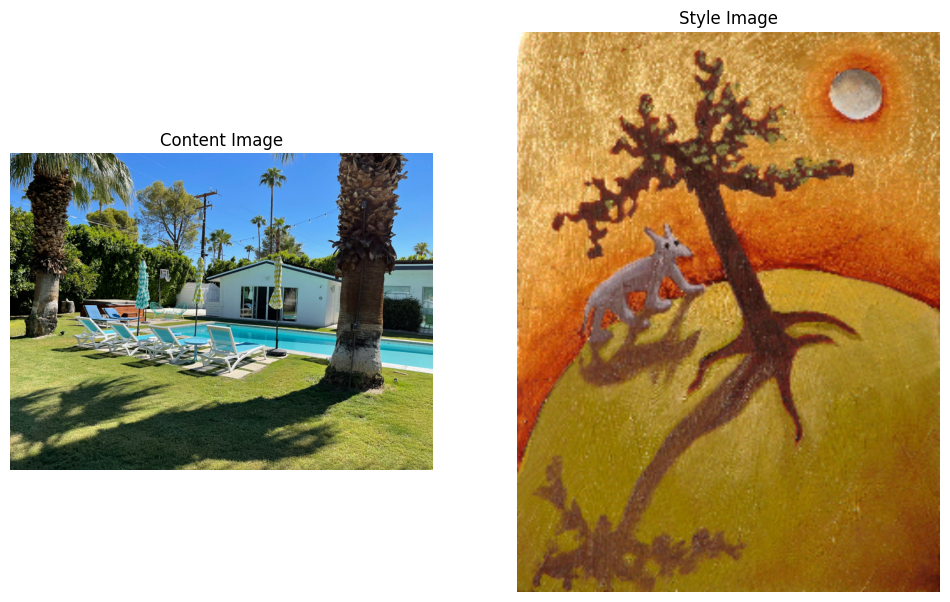

In [ ]:
# Creating the pastiche image

content_image = load_img(content_image)
style_image = load_img(style_image)

plt.subplot(1, 2, 1)
plt.axis('off')
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
plt.axis('off')
imshow(style_image, 'Style Image')

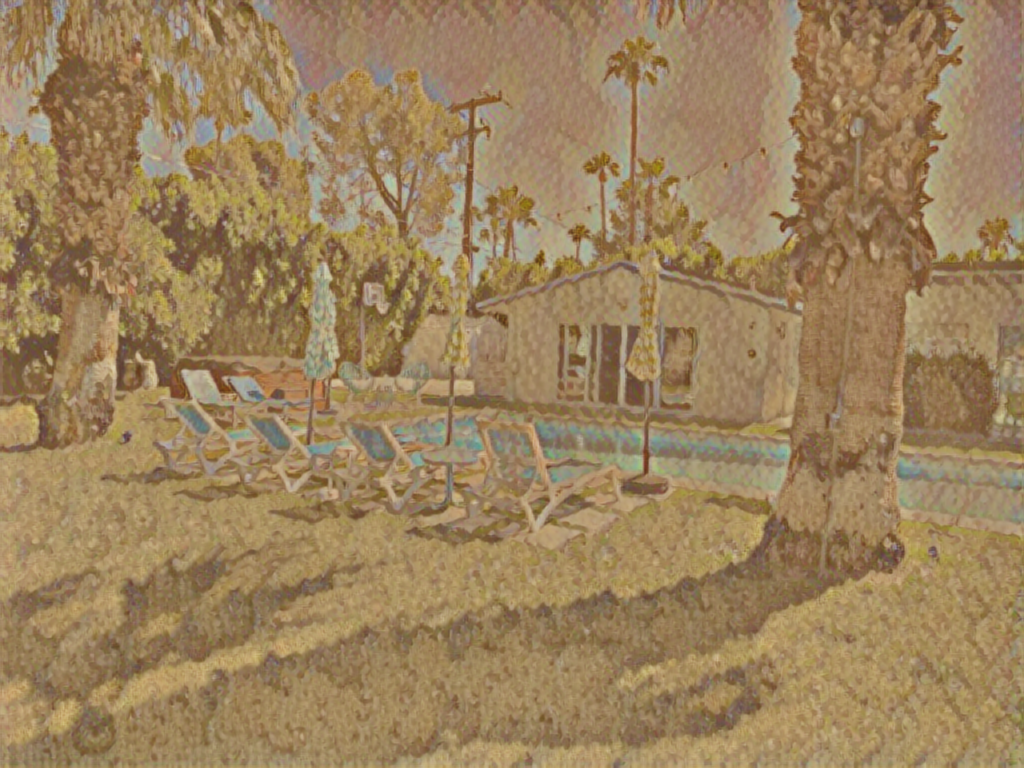

In [ ]:
# importing the VGG19 pre-trained model from Tensorflow_hub

import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
image = tensor_to_image(stylized_image)
image

In [ ]:
file_name = 'stylized-image.png'
image.save(file_name)

try:
  from google.colab import files
except ImportError:
   pass
else:
  files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>